In [11]:
import pickle as pkl

with open('data/dataset.pkl', 'rb') as f:
    data = pkl.load(f)

tonic = {}
mode = {}
style = {}
root = set()
durations = {}
scrap = set()
tot = 0
for name in data:
    tot += 1
    d = data[name]
    t = d['tonic']
    m = d['mode']
    s = d['style']
    if t in tonic:
        tonic[t] += 1
    else:
        tonic[t] = 1
    if m in mode:
        mode[m] += 1
    else:
        mode[m] = 1
    if s in style:
        style[s] += 1
    else:
        style[s] = 1

    for l in d['root']:
        root.update(l)

    for note in d['nmat']:
        dur = str(note[1]-note[0])

        if dur in ['15', '16', '13', '14', '11', '9', '10', '12', '26']:
            scrap.add(name)
        if dur in durations:
            durations[dur] += 1
        else:
            durations[dur] = 1

print("Tonic:")
print(tonic)

print("Mode:")
print(mode)

print("Style:")
print(style)

print("Root:")
print(root)

print("Durations:")
durations = list(durations.items())
durations.sort(key=lambda x : x[1], reverse=True)
print(durations)

print("Scrap:")
print("total samples: ", tot)
print("scrapping: ", len(scrap))
print(len(scrap)/tot)



TypeError: 'dict' object is not callable

In [14]:
import pickle as pkl

with open('data/dataset.pkl', 'rb') as f:
    data = pkl.load(f)

# print an excerpt of the dataset
#print("Excerpt:")
for name in data:
    print(name)
    print(data[name])
    break

TypeError: 'dict' object is not callable

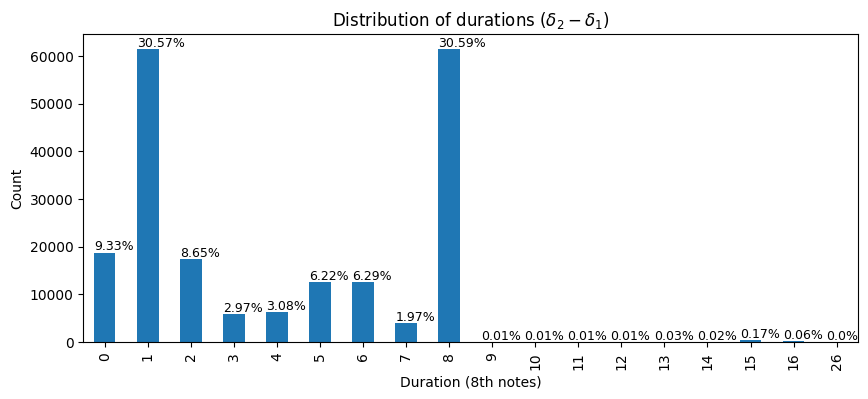

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(durations, columns=['duration', 'count'])

# Convert the 'duration' column to int type
df['duration'] = df['duration'].astype(int)

# Sort the dataframe based on the 'duration' column
df = df.sort_values('duration')

# Calculate percentage of total for each count
df['percentage'] = (df['count'] / df['count'].sum()) * 100

# Plot the sorted dataframe
ax = df.plot.bar(x='duration', y='count', figsize=(10, 4))

# Set the y-axis to log scale
#ax.set_yscale('log')

ax.set_title('Distribution of durations ($\delta_2 - \delta_1$)')

ax.set_xlabel('Duration (8th notes)')

ax.set_ylabel('Count')

# Add percentage on top of each bar
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x() + 0.0, i.get_height()+500, \
            str(round((i.get_height()/df['count'].sum())*100, 2))+'%', fontsize=9,
                color='black')
# remove the legend
ax.get_legend().remove()
plt.show()

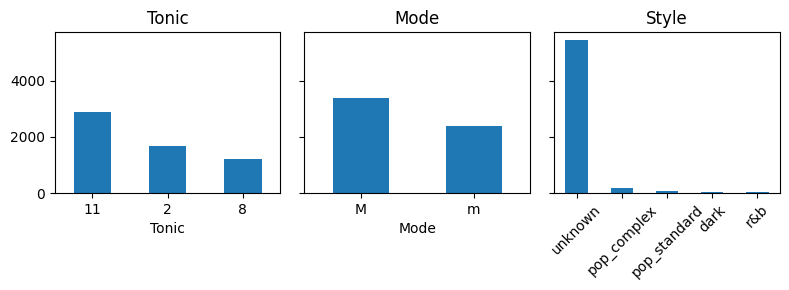

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# your data
tonic = {11: 2895, 2: 1672, 8: 1195}
mode = {'M': 3372, 'm': 2390}
style = {'unknown': 5442, 'pop_complex': 192, 'pop_standard': 74, 'dark': 32, 'r&b': 22}

# create dataframes
df_tonic = pd.DataFrame(list(tonic.items()), columns=['Tonic', 'Count'])
df_mode = pd.DataFrame(list(mode.items()), columns=['Mode', 'Count'])
df_style = pd.DataFrame(list(style.items()), columns=['Style', 'Count'])

# create subplots
fig, axes = plt.subplots(1, 3, figsize=(8, 3), sharey=True)

# plot data
df_tonic.plot.bar(x='Tonic', y='Count', ax=axes[0], legend=False)
df_mode.plot.bar(x='Mode', y='Count', ax=axes[1], legend=False)
df_style.plot.bar(x='Style', y='Count', ax=axes[2], legend=False)

# set titles
axes[0].set_title('Tonic')
axes[1].set_title('Mode')
axes[2].set_title('Style')

# rotate the xticks on each axes
for i, ax in enumerate(axes):
    if i == 2:
        # rotate "style" xticks 45 degrees
        plt.sca(ax)
        plt.xticks(rotation=45)
        # also remove the xlabel
        ax.set_xlabel('')
    else:
        plt.sca(ax)
        plt.xticks(rotation=0)

plt.tight_layout()
plt.show()
